<a href="https://colab.research.google.com/github/mlKwon/railway/blob/main/rail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn
from collections import Counter
from copy import deepcopy as dc
import gc, glob, os

from google.colab import drive
drive.mount('/content/drive')
os.chdir("drive/MyDrive/railroad")

Mounted at /content/drive


In [16]:
!pip install pyjanitor
!pip install --upgrade ipykernel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.25.1 which is incompatible.


In [5]:
# @title 데이터 컬럼 읽어오기
# os.chdir("drive/MyDrive/railroad")
from janitor import clean_names as cn
print(os.listdir())

cols = pd.read_csv('data_columns.csv')
cols

['lane_data_columns.csv', '차량_및_요댐퍼.xlsx', 'data_s70.csv', 'data_s100.csv', 'data_c30.csv', 'data_s30.csv', 'data_s50.csv', 'data_s40.csv', 'data_columns.csv', 'data_c100.csv', 'data_c70.csv', 'data_c50.csv', 'answer_sample.csv', 'lane_data_s.csv', 'data_c40.csv', 'lane_data_c.csv', 'data.zip', '2023 제1회 철도 인공지능 경진대회 모델 설명서.docx', 'rail_dictionary.xls', '태스크1.png', '데이터_메트릭.png']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,description
0,Distance,거리[m]
1,A_M1_C_B1_Y,대차상부 차체 횡가속도[m/s^2]
2,A_M1_C_B1_Z,대차상부 차체 수직가속도[m/s^2]
3,A_M1_B1_W1_Y_L,좌측 전위 대차 프레임 횡가속도[m/s^2]
4,A_M1_B1_BC_Y_L,좌측 중앙 대차 프레임 횡가속도[m/s^2]
5,A_M1_B1_W2_Y_L,좌측 후위 대차 프레임 횡가속도[m/s^2]
6,A_M1_B1_W1_Y_R,우측 전위 대차 프레임 횡가속도[m/s^2]
7,A_M1_B1_BC_Y_R,우측 중앙 대차 프레임 횡가속도[m/s^2]
8,A_M1_B1_W2_Y_R,우측 후위 대차 프레임 횡가속도[m/s^2]
9,A_M1_B1_W1_Z_L,좌측 전위 대차 프레임 수직가속도[m/s^2]


In [30]:
pd.read_csv('lane_data_columns.csv',encoding='cp949')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,type,name,description
0,curve,Distance,거리[m]
1,curve,Curvature,곡률[1/km]
2,curve,Vertical offset,선로중심부 높이[mm]
3,curve,Cross level offset,캔트[mm]
4,straight,Distance,거리[m]
5,straight,Cross level irregularity,우측 선로에 대한 좌측 선로 높이차(캔트) 불규칙도[mm]
6,straight,Curvature irregularity,곡선에 대한 불규칙도[1/km]
7,straight,Lateral irregularity,수평 불규칙도[mm]
8,straight,Vertical irregularity,수직 불규칙도[mm]
9,straight,Gauge variation,선로 게이지(좌우거리차이) 불규칙도[mm]


**태스크, 데이터 및 메트릭 정의**

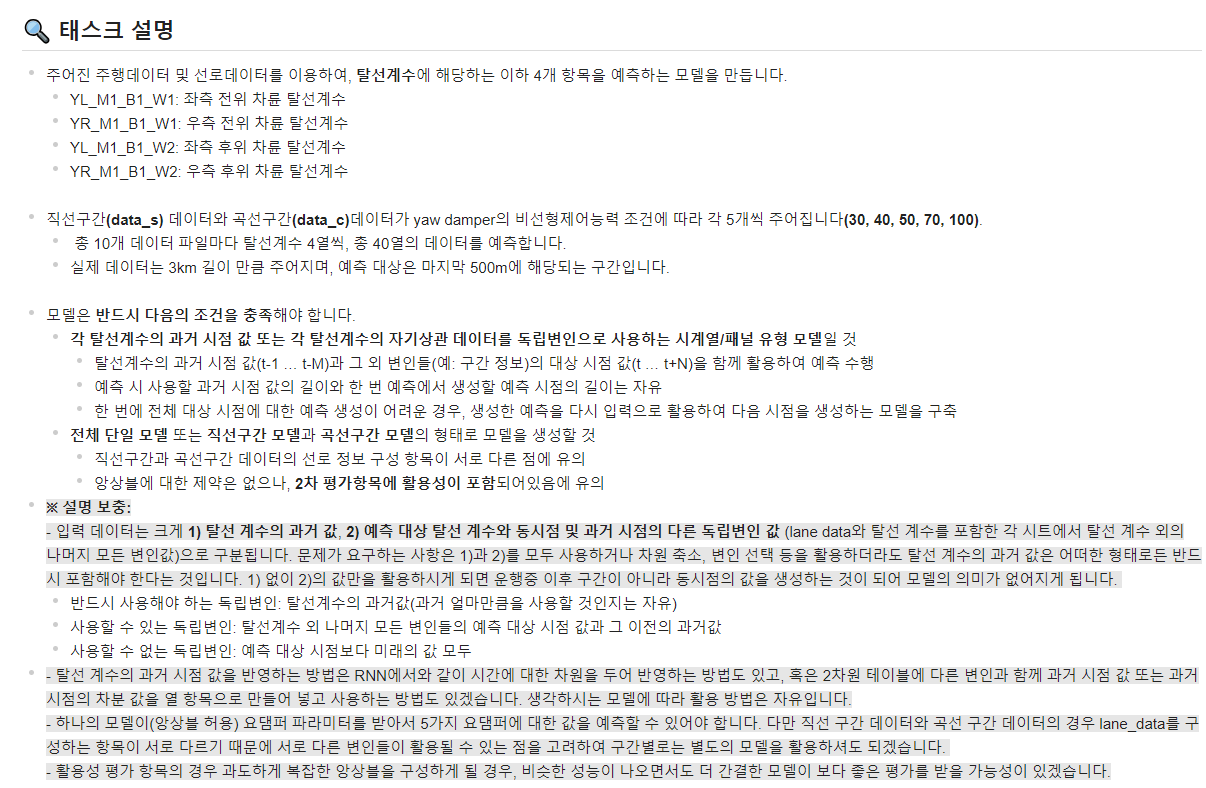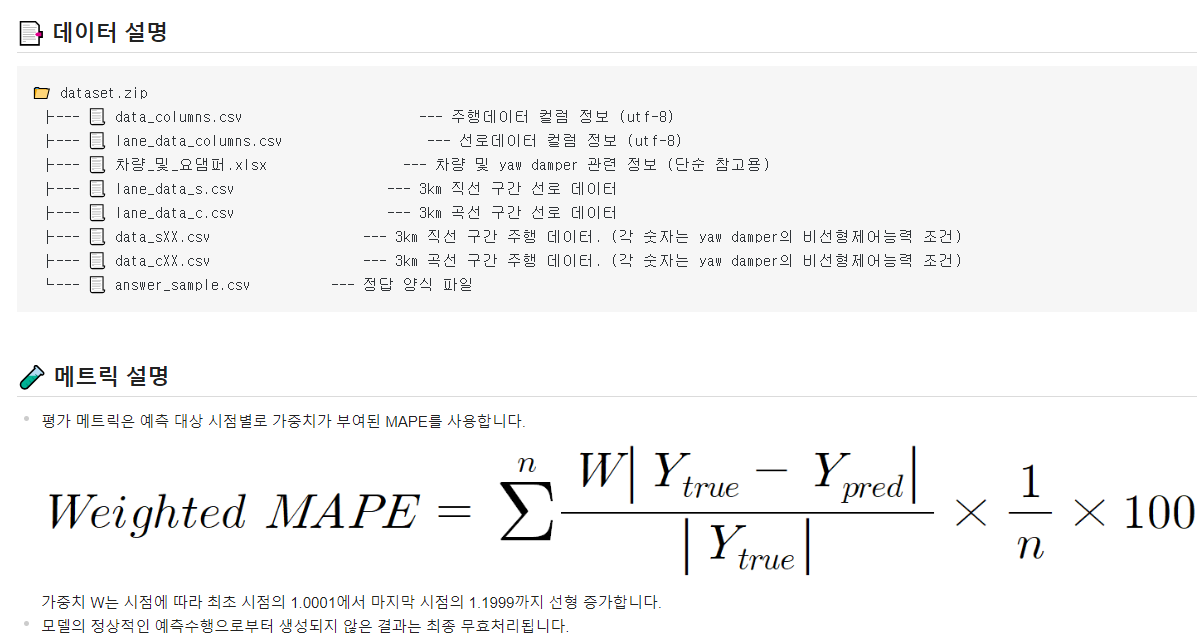

In [4]:
dat_lst = {}
for nm in os.listdir():
  if ('data_s' in nm) | ('data_c' in nm):
    if '.csv' in nm:
      print(nm)
      try:
        dat_lst[nm.replace(".csv","")] = cn(pd.read_csv(nm))
      except:
        dat_lst[nm.replace(".csv","")] = cn(pd.read_csv(nm, encoding='cp949'))
# os.listdir()
# dat_lst

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


lane_data_columns.csv
data_s70.csv
data_s100.csv
data_c30.csv
data_s30.csv
data_s50.csv
data_s40.csv
data_columns.csv
data_c100.csv
data_c70.csv
data_c50.csv
lane_data_s.csv
data_c40.csv
lane_data_c.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


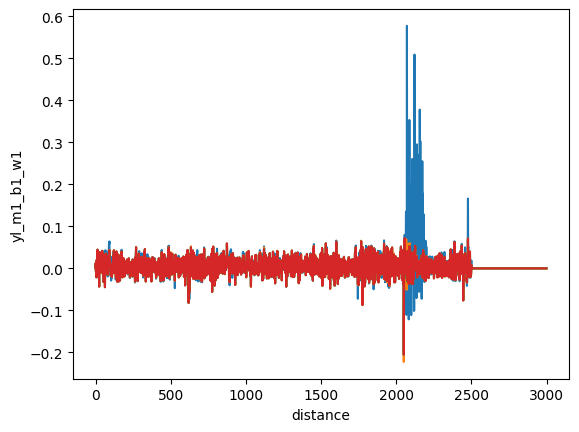

In [28]:
# @title EDA
from matplotlib import pyplot as plt
import seaborn as sns

temp = dat_lst['data_s30'].loc[:,['distance','yl_m1_b1_w1','yr_m1_b1_w1','yl_m1_b1_w2','yr_m1_b1_w2']]

# sns.lineplot(data=dat_lst['data_s30'], x='distance', y='yl_m1_b1_w1', color='red')
# sns.lineplot(data=dat_lst['data_c30'], x='distance', y='yl_m1_b1_w1', color='blue', alpha=.5)
# sns.lineplot(data=dat_lst['data_s100'], x='distance', y='yl_m1_b1_w1', color='green', alpha=.5)
# sns.lineplot(data=dat_lst['data_c100'], x='distance', y='yl_m1_b1_w1', color='red', alpha=.5)
sns.lineplot(data=dat_lst['data_c30'], x='distance', y='yl_m1_b1_w1')
sns.lineplot(data=dat_lst['data_c50'], x='distance', y='yl_m1_b1_w1')
sns.lineplot(data=dat_lst['data_c70'], x='distance', y='yl_m1_b1_w1')
sns.lineplot(data=dat_lst['data_c100'], x='distance', y='yl_m1_b1_w1')

plt.show()